**HTML parser**

One of the motivations behind introducing the HTML parser is to give you an appreciation for the power of derived classes. Coders provided a class that is customizable to meet many needs.

The HTML parser package is used to parse an HTML file.

The package provides a class called HTMLParser that has lots of functionality.

The parser moves through an HTML file and identifies

- opening tags
- closing tags
- data

It has functions which we can refer to as *handlers* 

- handle_starttag
- handle_endtag
- handle_data

for handling each of these possibilities which we override to accomplish some task.

In other words, we write our own versions of these handlers in our derived class.

In so doing, we build our own customized parser.

In the following example, we 

- print a message when we encounter a start tag
- print a message when we encounter an end tag

We'll use the parser to parse the html file from the Minneapolis fed's web site:

https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-

There is a method for the parser called **getpos** that gives the location of a tag (line number,column number) in the file being parsed. 

First we create our own parser that doesn't do anything.

In [6]:
from html.parser import HTMLParser
import requests as req

class MyHTMLParser(HTMLParser):
    pass

# get the html file
url="https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-"
res=req.get(url)
text=res.text

# save for later
with open("fed.html","w") as fout:
    fout.write(text)


# instantiate a parser
parser = MyHTMLParser()

# use feed method
parser.feed(text)


The parser provides methods for handling each type of tag, and by default these methods don't do anything. If we want them to do something, we need to write out our own handlers.

Here, we print out to the console every start tag and it's position.

In [12]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    
    # what to do if start tag encountered
    def handle_starttag(self, tag, attrs):
        print(tag+str(self.getpos()))
    # what to do if end tag encountered
    def handle_endtag(self, tag):
        pass
    # how to handle data
    def handle_data(self, data):
        pass

with open("fed.html") as fin:
    text=fin.read()

# instantiate a parser
parser = MyHTMLParser()

# use feed method to process a small portion
parser.feed(text[0:10000])


html(13, 0)
head(15, 0)
meta(19, 0)
meta(21, 0)
meta(23, 0)
link(25, 0)
link(27, 0)
link(29, 0)
link(31, 0)
link(35, 0)
link(37, 0)
script(45, 0)
script(55, 0)
title(79, 0)
meta(85, 0)
meta(87, 0)
meta(97, 0)
meta(99, 0)
meta(101, 0)
meta(103, 0)
meta(105, 0)
meta(111, 0)
meta(113, 0)
meta(115, 0)
meta(117, 0)
meta(119, 0)
script(125, 0)
script(167, 0)
script(173, 0)
script(179, 0)
script(185, 0)
script(189, 0)
script(193, 0)
script(195, 0)
body(203, 0)
noscript(211, 0)
iframe(213, 4)
header(225, 0)
a(231, 2)
div(233, 2)
div(235, 4)
div(237, 6)
a(239, 8)
svg(241, 0)
style(245, 0)
defs(263, 0)
g(267, 0)
circle(269, 0)
g(273, 0)
g(275, 0)
g(277, 0)
path(279, 0)
path(283, 0)
path(287, 0)
path(293, 0)
path(297, 0)
path(303, 0)
path(309, 0)
path(313, 0)
path(319, 0)
path(323, 0)
path(333, 0)
path(337, 0)
path(343, 0)
path(347, 0)
path(351, 0)
path(361, 0)
path(367, 0)
path(371, 0)
path(375, 0)
path(383, 0)
path(387, 0)
path(393, 0)
path(397, 0)
path(401, 0)
path(405, 0)


Supppose we want to count how many times a particular tag appears?
Here we count the start td (table cell) tags in the entire file.

In [17]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    
    td_start_count=0
    
    # what to do if start tag encountered
    def handle_starttag(self, tag, attrs):
        if tag=="td":
            self.td_start_count+=1
    # what to do if end tag encountered
    def handle_endtag(self, tag):
        pass
    # how to handle data
    def handle_data(self, data):
        pass

with open("fed.html") as fin:
    text=fin.read()

# instantiate a parser
parser = MyHTMLParser()

# use feed method to process a small portion
parser.feed(text)

print(parser.td_start_count)

333


As a reality check count the end td tags too.

In [18]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    
    td_start_count=0
    td_end_count=0
    
    # what to do if start tag encountered
    def handle_starttag(self, tag, attrs):
        if tag=="td":
            self.td_start_count+=1
    # what to do if end tag encountered
    def handle_endtag(self, tag):
        if tag=="td":
            self.td_end_count+=1
    # how to handle data
    def handle_data(self, data):
        pass

with open("fed.html") as fin:
    text=fin.read()

# instantiate a parser
parser = MyHTMLParser()

# use feed method to process a small portion
parser.feed(text)

print(parser.td_start_count)
print(parser.td_end_count)

333
333


In [ ]:
How many tables are there?

In [20]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    
    table_start_count=0
    
    # what to do if start tag encountered
    def handle_starttag(self, tag, attrs):
        if tag=="table":
            self.table_start_count+=1
    # what to do if end tag encountered
    def handle_endtag(self, tag):
        pass
    # how to handle data
    def handle_data(self, data):
        pass

with open("fed.html") as fin:
    text=fin.read()
    
# instantiate a parser
parser = MyHTMLParser()

# use feed method
parser.feed(text)

print(parser.table_start_count)

1


**Extracting only certain data**

Now suppose we only want to extract data that appears somewhere in a specific context.

For example, maybe we only want data in the title i.e. data enclosed in \<title> ... \<title/>.

We need to do something with the handle_data function. 

But how does this function know whether data is enclosed in those tags?

We need to introduce a *flag* that tell the parser whether it is currently inside a start and end title tag.

The flag will be a class attribute.

In [22]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    in_table=False
    # what to do if start tag encountered
    def handle_starttag(self, tag, attrs):
        if tag=="table":
            self.in_table=True
    # what to do if end tag encountered
    def handle_endtag(self, tag):
        if tag=="table":
            self.in_table=False
    # how to handle data
    def handle_data(self, data):
        if self.in_table:
            print(data)
with open("fed.html") as fin:
    text=fin.read()

# instantiate a parser
parser = MyHTMLParser()

# use feed method
#parser.feed(text)


Instead of printing, put the data in a list..

In [26]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    in_table=False
    table_data=[]
    # what to do if start tag encountered
    def handle_starttag(self, tag, attrs):
        if tag=="table":
            self.in_table=True
    # what to do if end tag encountered
    def handle_endtag(self, tag):
        if tag=="table":
            self.in_table=False
    # how to handle data
    def handle_data(self, data):
        if self.in_table:
            self.table_data.append(data)

with open("fed.html") as fin:
    text=fin.read()

# instantiate a parser
parser = MyHTMLParser()

# use feed method
parser.feed(text)
#parser.table_data

Put data in a list of lists, one sub-list for each table row.

In [28]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    in_table=False
    table_data=[]
    in_row=False
    row_data=[]
    # what to do if start tag encountered
    def handle_starttag(self, tag, attrs):
        if tag=="table":
            self.in_table=True
        if tag=="tr":
            # start a new row
            self.in_row=True
            self.row_data=[]
    # what to do if end tag encountered
    def handle_endtag(self, tag):
        if tag=="table":
            self.in_table=False
        if tag=="tr":
            self.table_data.append(self.row_data)
            self.in_row=False
    # how to handle data
    def handle_data(self, data):
        if self.in_table:
            if self.in_row:
                self.row_data.append(data)

with open("fed.html") as fin:
    text=fin.read()

# instantiate a parser
parser = MyHTMLParser()

# use feed method
parser.feed(text)
#parser.table_data

Now we save that list and try to clean it up.

In [29]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    in_table=False
    table_data=[]
    in_row=False
    row_data=[]
    # what to do if start tag encountered
    def handle_starttag(self, tag, attrs):
        if tag=="table":
            self.in_table=True
        if tag=="tr":
            # start a new row
            self.in_row=True
            self.row_data=[]
    # what to do if end tag encountered
    def handle_endtag(self, tag):
        if tag=="table":
            self.in_table=False
        if tag=="tr":
            self.table_data.append(self.row_data)
            self.in_row=False
    # how to handle data
    def handle_data(self, data):
        if self.in_table:
            if self.in_row:
                self.row_data.append(data)

with open("fed.html") as fin:
    text=fin.read()

# instantiate a parser
parser = MyHTMLParser()

# use feed method
parser.feed(text)
L=parser.table_data

How many cells in each row are there?

In [32]:
[len(row) for row in L]

[8,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13]

Look at some rows.

In [36]:
for i in range(5):
    print(L[i])

['\n            ', 'Year', '\n            ', 'Annual Average CPI(-U)', '\n            ', 'Annual Percent Change', '\n            (rate of inflation)', '\n        ']
['\n            ', '\n            ', '1913', '\n            ', '\n            ', '\n            ', '9.9', '\n            ', '\n            ', '\n            ', '\xa0', '\n            ', '\n        ']
['\n            ', '\n            ', '1914', '\n            ', '\n            ', '\n            ', '10.0', '\n            ', '\n            ', '\n            ', '1.3%', '\n            ', '\n        ']
['\n            ', '\n            ', '1915', '\n            ', '\n            ', '\n            ', '10.1', '\n            ', '\n            ', '\n            ', '0.9%', '\n            ', '\n        ']
['\n            ', '\n            ', '1916', '\n            ', '\n            ', '\n            ', '10.9', '\n            ', '\n            ', '\n            ', '7.7%', '\n            ', '\n        ']


Use list comprehension to get the rows after the first and leave out all those blank cell entries.

In [83]:
H=L[0]
L=L[1:len(L)]

In [84]:
L2=[[x[2],x[6],x[10]] for x in L]
L2

[['1914', '10.0', '1.3%'],
 ['1915', '10.1', '0.9%'],
 ['1916', '10.9', '7.7%'],
 ['1917', '12.8', '17.8%'],
 ['1918', '15.0', '17.3%'],
 ['1919', '17.3', '15.2%'],
 ['1920', '20.0', '15.6%'],
 ['1921', '17.9', '-10.9%'],
 ['1922', '16.8', '-6.2%'],
 ['1923', '17.1', '1.8%'],
 ['1924', '17.1', '0.4%'],
 ['1925', '17.5', '2.4%'],
 ['1926', '17.7', '0.9%'],
 ['1927', '17.4', '-1.9%'],
 ['1928', '17.2', '-1.2%'],
 ['1929', '17.2', '0.0%'],
 ['1930', '16.7', '-2.7%'],
 ['1931', '15.2', '-8.9%'],
 ['1932', '13.6', '-10.3%'],
 ['1933', '12.9', '-5.2%'],
 ['1934', '13.4', '3.5%'],
 ['1935', '13.7', '2.6%'],
 ['1936', '13.9', '1.0%'],
 ['1937', '14.4', '3.7%'],
 ['1938', '14.1', '-2.0%'],
 ['1939', '13.9', '-1.3%'],
 ['1940', '14.0', '0.7%'],
 ['1941', '14.7', '5.1%'],
 ['1942', '16.3', '10.9%'],
 ['1943', '17.3', '6.0%'],
 ['1944', '17.6', '1.6%'],
 ['1945', '18.0', '2.3%'],
 ['1946', '19.5', '8.5%'],
 ['1947', '22.3', '14.4%'],
 ['1948', '24.0', '7.7%'],
 ['1949', '23.8', '-1.0%'],
 ['1950',

What are those \xa0 characters that appear in strings?
And how do we get rid of them?
\xa0 is a non-breaking space and this appears whenever the html file has an &nbsp; character.

In [85]:
with open("nonbreaking_space.html","r") as fin:
    text=fin.read()
#print(text)

class MyHTMLParser(HTMLParser):
    
    in_para=False
    data=[]
    # what to do if start tag encountered
    def handle_starttag(self, tag, attrs):
        if tag=="p":
            self.in_para=True
    # what to do if end tag encountered
    def handle_endtag(self, tag):
        if tag=="p":
            self.in_para=False
    # how to handle data
    def handle_data(self, data):
        if self.in_para:
            self.data.append(data)

# instantiate a parser
parser = MyHTMLParser()
parser.feed(text)
parser.data


['\nThis is a sentence in a paragraph.\n', '\n\xa0\n']

In [86]:
parser.data[1].replace('\xa0','')

'\n\n'

In [ ]:
We can do this.

In [82]:
L2=[[x[0].replace('\xa0',''), x[1].replace('\xa0',''), x[2].replace('\xa0','')] for x in L2]

In [ ]:
Or this

In [70]:
L3=[list(map(lambda x:x.replace('\xa0',''),x)) for x in L2]

In [ ]:
There are % signs to remove.

In [87]:
L4=[list(map(lambda x:x.replace('%',''),x)) for x in L3]

In [ ]:
And an asterisk in the last row.

In [88]:
L5=[list(map(lambda x:x.replace('*',''),x)) for x in L4]

In [89]:
L5

[['1913', '9.9', ''],
 ['1914', '10.0', '1.3'],
 ['1915', '10.1', '0.9'],
 ['1916', '10.9', '7.7'],
 ['1917', '12.8', '17.8'],
 ['1918', '15.0', '17.3'],
 ['1919', '17.3', '15.2'],
 ['1920', '20.0', '15.6'],
 ['1921', '17.9', '-10.9'],
 ['1922', '16.8', '-6.2'],
 ['1923', '17.1', '1.8'],
 ['1924', '17.1', '0.4'],
 ['1925', '17.5', '2.4'],
 ['1926', '17.7', '0.9'],
 ['1927', '17.4', '-1.9'],
 ['1928', '17.2', '-1.2'],
 ['1929', '17.2', '0.0'],
 ['1930', '16.7', '-2.7'],
 ['1931', '15.2', '-8.9'],
 ['1932', '13.6', '-10.3'],
 ['1933', '12.9', '-5.2'],
 ['1934', '13.4', '3.5'],
 ['1935', '13.7', '2.6'],
 ['1936', '13.9', '1.0'],
 ['1937', '14.4', '3.7'],
 ['1938', '14.1', '-2.0'],
 ['1939', '13.9', '-1.3'],
 ['1940', '14.0', '0.7'],
 ['1941', '14.7', '5.1'],
 ['1942', '16.3', '10.9'],
 ['1943', '17.3', '6.0'],
 ['1944', '17.6', '1.6'],
 ['1945', '18.0', '2.3'],
 ['1946', '19.5', '8.5'],
 ['1947', '22.3', '14.4'],
 ['1948', '24.0', '7.7'],
 ['1949', '23.8', '-1.0'],
 ['1950', '24.1', '1.1'

In [90]:
def myfloat(x):
    try:
        y=float(x)
    except:
        y=999.
    return(y)

In [91]:
L6=[[int(x[0]),myfloat(x[1]),myfloat(x[2])] for x in L5]

In [92]:
L6

[[1913, 9.9, 999.0],
 [1914, 10.0, 1.3],
 [1915, 10.1, 0.9],
 [1916, 10.9, 7.7],
 [1917, 12.8, 17.8],
 [1918, 15.0, 17.3],
 [1919, 17.3, 15.2],
 [1920, 20.0, 15.6],
 [1921, 17.9, -10.9],
 [1922, 16.8, -6.2],
 [1923, 17.1, 1.8],
 [1924, 17.1, 0.4],
 [1925, 17.5, 2.4],
 [1926, 17.7, 0.9],
 [1927, 17.4, -1.9],
 [1928, 17.2, -1.2],
 [1929, 17.2, 0.0],
 [1930, 16.7, -2.7],
 [1931, 15.2, -8.9],
 [1932, 13.6, -10.3],
 [1933, 12.9, -5.2],
 [1934, 13.4, 3.5],
 [1935, 13.7, 2.6],
 [1936, 13.9, 1.0],
 [1937, 14.4, 3.7],
 [1938, 14.1, -2.0],
 [1939, 13.9, -1.3],
 [1940, 14.0, 0.7],
 [1941, 14.7, 5.1],
 [1942, 16.3, 10.9],
 [1943, 17.3, 6.0],
 [1944, 17.6, 1.6],
 [1945, 18.0, 2.3],
 [1946, 19.5, 8.5],
 [1947, 22.3, 14.4],
 [1948, 24.0, 7.7],
 [1949, 23.8, -1.0],
 [1950, 24.1, 1.1],
 [1951, 26.0, 7.9],
 [1952, 26.6, 2.3],
 [1953, 26.8, 0.8],
 [1954, 26.9, 0.3],
 [1955, 26.8, -0.3],
 [1956, 27.2, 1.5],
 [1957, 28.1, 3.3],
 [1958, 28.9, 2.7],
 [1959, 29.2, 1.08],
 [1960, 29.6, 1.5],
 [1961, 29.9, 1.1]

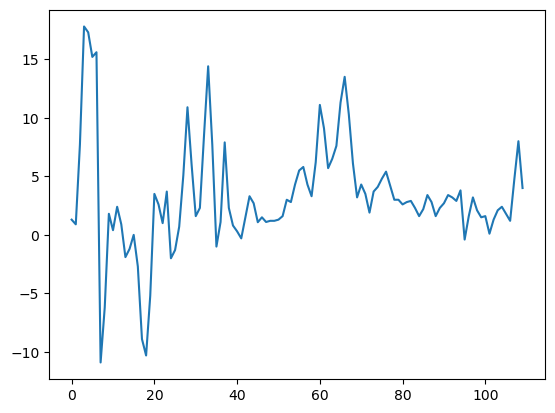

In [96]:
import matplotlib.pyplot as plt
col1=[x[2] for x in L6[1:]]
plt.plot(col1)